<a href="https://colab.research.google.com/github/Vaishuselvan/Student_performance_ml/blob/main/intershipstudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDENT PERFORMANCE IN EXAM


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.shape

(1000, 8)

DATA VISHUALIZATION

In [ ]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

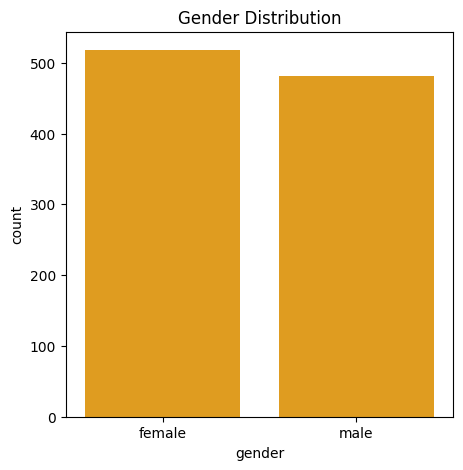

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender',data=df, color= 'orange')
plt.title('Gender Distribution')
plt.show()


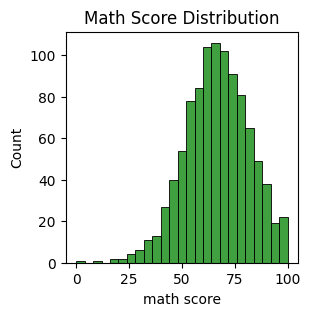

In [ ]:
#math score
plt.figure(figsize=(3,3))
sns.histplot(df['math score'], color = 'green')
plt.title('Math Score Distribution')
plt.show()

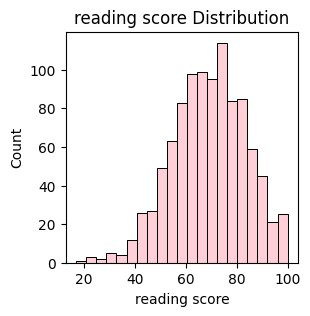

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df['reading score'], color = 'pink')
plt.title('reading score Distribution')
plt.show()

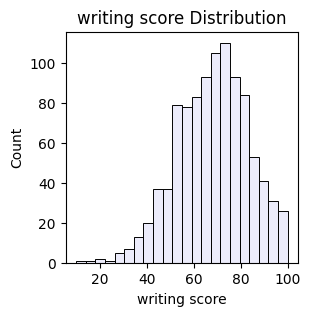

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df['writing score'], color = 'lavender')
plt.title('writing score Distribution')
plt.show()

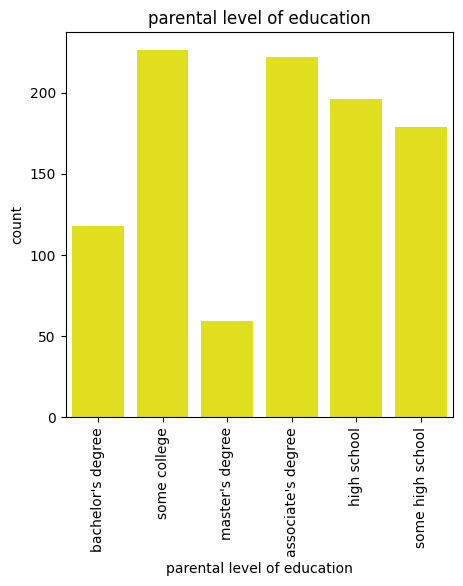

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='parental level of education',data=df, color = 'yellow')
plt.title('parental level of education')
plt.xticks(rotation=90)
plt.show()



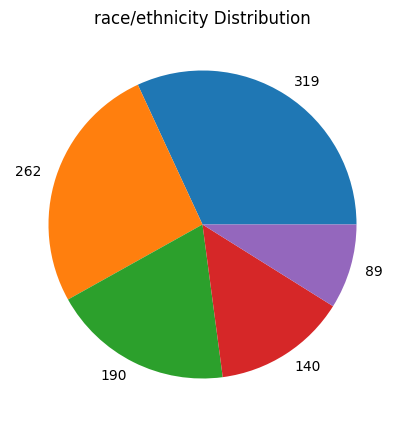

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts())
plt.title('race/ethnicity Distribution')
plt.show()



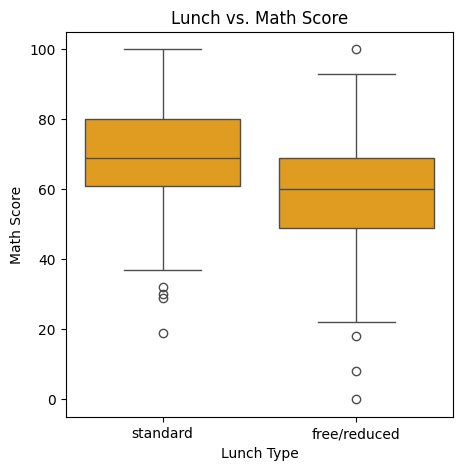

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='lunch', y='math score', data=df, color='orange')
plt.title('Lunch vs. Math Score')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')
plt.show()

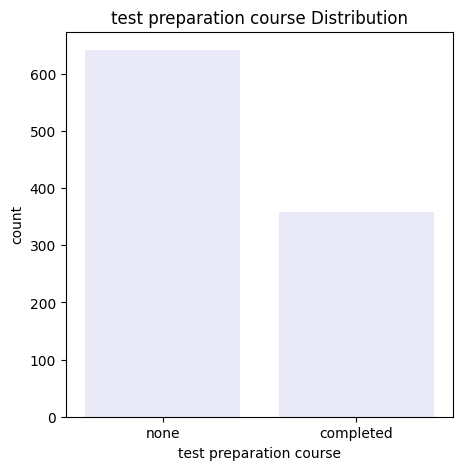

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='test preparation course',data=df, color='lavender')
plt.title('test preparation course Distribution')
plt.show()

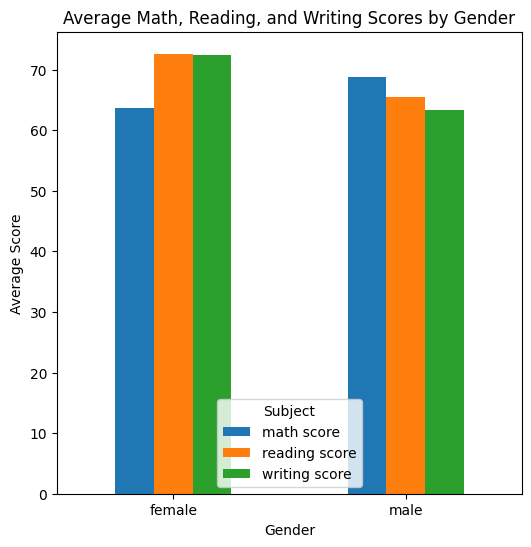

In [ ]:
# Calculate the average scores for each gender
average_scores = df.groupby('gender')[
    ['math score', 'reading score', 'writing score']].mean()

# Plotting
average_scores.plot(kind='bar', figsize=(6,6))
plt.title('Average Math, Reading, and Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.show()

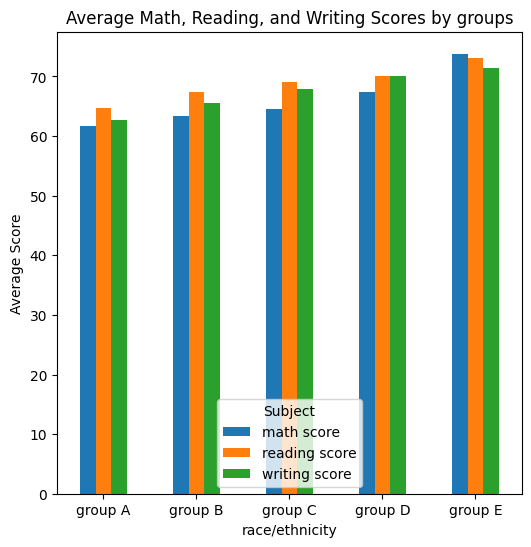

In [ ]:
average_scores = df.groupby('race/ethnicity')[
    ['math score', 'reading score', 'writing score']].mean()
average_scores.plot(kind='bar', figsize=(6,6))
plt.title('Average Math, Reading, and Writing Scores by groups')
plt.xlabel('race/ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df.drop(columns=['math score'])
y = df['math score']

#SPLIT TEST AND TRAIN DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


label_encoders = {}
for column in ['gender', 'race/ethnicity', 'parental level of education',
               'lunch', 'test preparation course']:
    label_encoder = LabelEncoder()
    label_encoders[column] = label_encoder
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

SPLLITING THE DATA FOR TEST AND TRAIN


regrission model

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor()
}

fitting model


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if name == 'Logistic Regression':
        predictions = predictions.round()
        results[name] = accuracy_score(y_test, predictions)
    else:
        results[name] = mean_squared_error(y_test, predictions)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Result of all model

In [ ]:
for name, metric in results.items():
    if name == 'Logistic Regression':
        print(f"{name}: Accuracy = {metric:.2f}")
    else:
        print(f"{name}: MSE = {metric:.2f}")

Logistic Regression: Accuracy = 0.02
Linear Regression: MSE = 28.28
Decision Tree: MSE = 60.86
Random Forest: MSE = 36.79
Support Vector Regressor (SVR): MSE = 92.43
K-Nearest Neighbors (KNN): MSE = 82.34
